In [1]:
import numpy as np

import matplotlib.pyplot as plt 

import pandas as pd

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('data.csv')

In [3]:
x_hours =  np.array(df.Hours).reshape(-1,1)
y_pass = np.array(df.Pass)

In [4]:
model_fit = LogisticRegression(C=10000).fit(x_hours,y_pass)

In [5]:
print(model_fit.intercept_,model_fit.coef_)

[-4.07756199] [[1.50458575]]


In [6]:
y_predict = model_fit.predict_proba(x_hours)[:,1]

In [7]:
logit_roc_auc = roc_auc_score(y_pass, y_predict)
auc_str = "AUC " + str(logit_roc_auc)

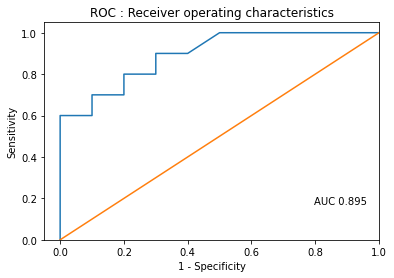

In [8]:
fpr, tpr, thresholds = roc_curve(y_pass, y_predict)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1])
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC : Receiver operating characteristics')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.figtext(.75, .25, auc_str)
plt.show()